# **Variant 11**

# Task 1
Существует N = 22 альтернативы решения некой проблемы. Сгенерируйте матрицу размерностью NхN (турнирную таблицу). 
1.	Постройте граф турнира
2.	Проведите оценку «силы» каждого игрока (каждой альтернативы) методом собственного вектора.


С помощью библиотеки numpy создается матрица с нулевой диагональю и для придачи ей "турнирного" вида вычитаются противоположные значение для зеркальных ячееек относительно нулевой диагонали.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 22  # number of alternatives
matrix = np.zeros((N, N), dtype=int)  # create a matrix filled with 0s

# loop through the matrix and randomly fill each cell with a 0 or 1
for i in range(N):
    for j in range(i+1, N):
        matrix[i,j] = np.random.randint(0, 2)  # random integer between 0 and 1
        matrix[j,i] = 1 - matrix[i,j]  # opposite value for the mirrored cell
matrix


array([[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1,

На основе турнирной матрицы создается ориентированных граф: 


1.   Создается граф
2.   Заполняется N узлами
3.   Добавляются ребра к графу где ячейки содержат 1



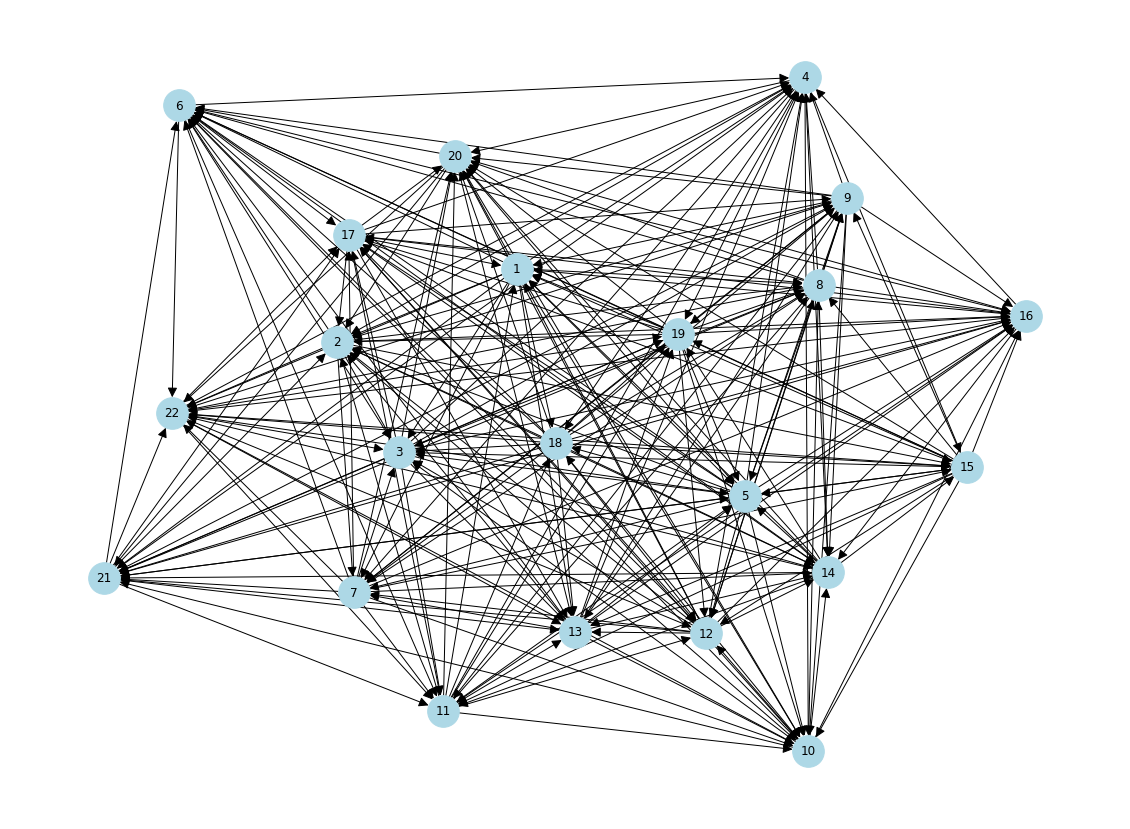

In [ ]:

# create a directed graph
G = nx.DiGraph(directed=True)

# add nodes to the graph
for i in range(1, N+1):
    G.add_node(i)

# add edges to the graph for cells that contain a 1 in the matrix
for i in range(N):
    for j in range(N):
        if matrix[i,j] == 1:
            G.add_edge(i+1, j+1)  # add edge from i+1 to j+1 (since node labels start at 1)

# draw the graph
pos = nx.spring_layout(G, seed=42)  # layout algorithm
fig, ax = plt.subplots(figsize=(20, 15))  # create a larger plot
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', edge_color='black', arrowsize=20, font_size=12, ax=ax)

# show the graph
plt.show()


Чтобы определить силу альтернативы вычисляется значение ее собственного вектора, чем оно больше, тем альтернатива имеет большее количество ориентированных ребер, следовательно больше побед.
1.   Вычисляется размерность собственного вектора

 Формула для вычисления данной меры:
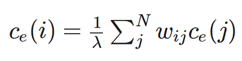

где i — индекс рассматриваемой вершины, w_{ij} — вес ребра (i, j), \lambda — некоторый нормировочный коэффициент.

Для вычисления центральности по собственному вектору необходимо преобразовать данную формулу, введя обозначения
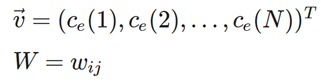

где \vec{v} — вектор, состоящий из значений центральностей каждой вершины, W — матрица весов рассматриваемого графа.


2.   Сортируется размерность собственного вектора для каждого узла



Документация функции https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html

In [ ]:
# compute the eigenvector centrality for each node
eigenvector_centrality = nx.eigenvector_centrality(G)

sorted_dict = dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1],reverse=True))
# print the eigenvector centrality for each node
for node, centrality in sorted_dict.items():
    print(f"Alternative {node}: {centrality:.3f}")

Alternative 16: 0.277
Alternative 6: 0.273
Alternative 4: 0.272
Alternative 2: 0.257
Alternative 10: 0.243
Alternative 20: 0.241
Alternative 22: 0.235
Alternative 21: 0.231
Alternative 14: 0.221
Alternative 11: 0.213
Alternative 13: 0.210
Alternative 17: 0.204
Alternative 5: 0.203
Alternative 3: 0.200
Alternative 8: 0.186
Alternative 19: 0.178
Alternative 12: 0.178
Alternative 9: 0.173
Alternative 7: 0.172
Alternative 15: 0.166
Alternative 1: 0.160
Alternative 18: 0.108


# Task 2
Правительство приняло решение выделить денежные средства из бюджета наиболее важному социальному объекту. Для выделения самого приоритетного были приглашены эксперты (70 чел.) и рассмотрены предложенные варианты: 
1.	Разбить парк отдыха 
2.	Построить теннисные корты 
3.	Построить телебашню 
4.	Реконструировать центральную площадь 
5.	Построить библиотеку
Сравнение проводилось путем голосования по вопросам «Кто считает, что альтернатива ai предпочтительнее aj?». 

Числа полученных голосов за и против заносились в матрицу V (необходимо составить матрицу размерностью 5х5, такую, чтобы сумма элементов xij+xji=70. 
V=- x12   x15 x21 -      -      -  x25    - 
1.	Определить наиболее предпочтительный вариант. 
2.	Оцените согласованность суждений экспертов.


In [ ]:
import numpy as np
N = 5

V = np.zeros((N,N), dtype=int)
for i in range(N):
    for j in range(i+1, N):
        V[i,j] = np.random.randint(1, 70)
        V[j,i] = 70 - V[i,j]
        
print("V:\n", V)


V:
 [[ 0  5  7 21 19]
 [65  0 28  4 60]
 [63 42  0 27  8]
 [49 66 43  0 33]
 [51 10 62 37  0]]


На основе матрицы создается обратносимметричная матрица Z с элементами ,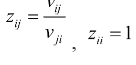 .


In [ ]:
# Create an inversely symmetric matrix Z out of V
Z = np.zeros((N,N), dtype=float)
for i in range(N):
    for j in range(N):
        if V[i,j] + V[j,i] == 0:
            Z[i,j] = 1
        else:
            Z[i,j] = (V[i,j] / V[j,i])

# Round Z to two decimal places
Z = np.round(Z, decimals=2)
print("Z:\n", Z)

Z:
 [[ 1.   0.1  0.1  0.4  0.4]
 [13.   1.   0.7  0.1  6. ]
 [ 9.   1.5  1.   0.6  0.1]
 [ 2.3 16.5  1.6  1.   0.9]
 [ 2.7  0.2  7.8  1.1  1. ]]


Вычисляется основной собственный вектор матрицы Z

---


документация https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
# Compute the main eigenvector of Z
eigenvals, eigenvects = np.linalg.eig(Z)
idx = np.argmax(eigenvals) # find the index of the largest eigenvalue
main_eigenvector = eigenvects[:, idx].real # get the corresponding eigenvector
# Get the corresponding eigenvalue
main_eigenvalue = eigenvals[idx].real

print("Main Eigenvalue:", main_eigenvalue)

print("Main Eigenvector:", main_eigenvector)

Main Eigenvalue: 9.234909333596221
Main Eigenvector: [0.06399299 0.37207044 0.20292694 0.83934625 0.33434565]


Лучшее решение - элемент вектора с наибольшим значением

In [ ]:
alternatives = ['Разбить парк отдыха',
'Построить теннисные корты',
'Построить телебашню',
'Реконструировать центральную площадь',
'Построить библиотеку']
print('Лучшее решение: ' + alternatives[main_eigenvector.argmax()])

Лучшее решение: Реконструировать центральную площадь


Вычисляется согласованность экспертов


> Главное собственное число согласованной матрицы, как мы знаем, равно ее порядку: , при наличии возмущений λmax > n. В качестве индекса согласованности (Consistency Index — CI) предлагается использовать отношение:
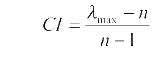



> Томас Саати рекомендует следующее эмпирическое правило. На основании моделирования большого числа случайных обратносимметричных матриц порядка n следует рассчитать средние значения случайного индекса согласованности (Random Index — RI) и сравнить его с CI. Проведенные Саати эксперименты дали следующие усредненные значения RI:
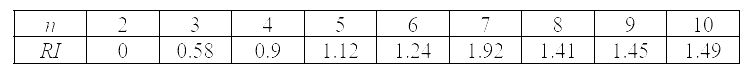



> отношение согласованности (Consistency Ratio) 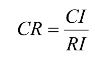





In [ ]:
CI = (main_eigenvalue-N)/(N-1)
RI = 1.12
CR = CI/RI
if CR > 0.1:
  print(f"ALL BAD CR: {CR}")
else:
  print(f"ALL GOOD CR:{CR}")

ALL BAD CR: 0.9452922619634421


# Delphy
Руководителем предприятия принято решение об автоматизации процесса «Управление автотранспортом». Предприятие уже использует несколько информационных систем для автоматизации своей деятельности. Среди таких систем используется конфигурация 1С:Предприятие «Комплексная автоматизация», которая автоматизирует бухгалтерский учет, управленческий учет. Система «Кадры» для автоматизации процесса «Управления кадрами». Среди возможных решений по автоматизации процесса «Управление автотранспортом» были выявлены следующие:
1. Разработать самостоятельно силами информационного отдела бизнес-приложение для автоматизации процесса «Управление транспортом» в рамках используемой конфигурации 1С: Предприятие «Комплексная автоматизация».
2. Разработать силами внешних подрядчиков бизнес-приложение для автоматизации процесса «Управление транспортом» в рамках используемой конфигурации 1С:Предприятие «Комплексная автоматизация».
3. Разработать самостоятельно силами информационного отдела отдельное бизнес-приложение для автоматизации процесса «Управление транспортом» и интегрировать его с существующими информационными системами.
4. Разработать силами внешних подрядчиков отдельное бизнес-приложение для автоматизации процесса «Управление транспортом» и интегрировать его с существующими информационными системами.


С помощью бета-распределения генеруются экспертные оценки по каждому из выбранных каритериев:
"Экономическая эффективность", "Интеграция с существующими системами", "Удобство для пользователя", "Масштабируемость", "Безопасность", среди каждой альтернативы:
1. Разработать самостоятельно силами информационного отдела бизнес-приложение для автоматизации процесса «Управление транспортом» в рамках используемой конфигурации 1С: Предприятие «Комплексная автоматизация».
2. Разработать силами внешних подрядчиков бизнес-приложение для автоматизации процесса «Управление транспортом» в рамках используемой конфигурации 1С:Предприятие «Комплексная автоматизация».
3. Разработать самостоятельно силами информационного отдела отдельное бизнес-приложение для автоматизации процесса «Управление транспортом» и интегрировать его с существующими информационными системами.
4. Разработать силами внешних подрядчиков отдельное бизнес-приложение для автоматизации процесса «Управление транспортом» и интегрировать его с существующими информационными системами.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the number of experts
num_experts = 30

# Set the mode of the beta distribution
mode = 80

# Define the possible solutions and criteria
solutions = ['1. Develop independently within 1C Enterprise "Integrated Automation"',
             '2. Develop by external contractors within 1C Enterprise "Complex automation"',
             '3. Develop independently and integrate with existing systems',
             '4. Develop by external contractors and integrate with existing systems']
criteria = ['Cost-effectiveness', 'Integration with existing systems', 'User-friendliness', 'Scalability', 'Security']#"Экономическая эффективность", "Интеграция с существующими системами", "Удобство для пользователя", "Масштабируемость", "Безопасность"

# Initialize a dictionary to store the ratings for each solution on each criterion
ratings = {}

# Loop over each solution and criterion
for solution in solutions:
    ratings[solution] = {}
    for criterion in criteria:

        # Generate the ratings for each expert using the beta distribution
        expert_ratings = np.around(np.random.beta(2, 5, num_experts) * (100 - mode) + mode, 1)
        
        # Store the ratings in the dictionary
        ratings[solution][criterion] = expert_ratings.tolist()

print(ratings)

{'1. Develop independently within 1C Enterprise "Integrated Automation"': {'Cost-effectiveness': [80.6, 81.6, 88.0, 89.1, 83.3, 85.8, 88.2, 82.3, 85.2, 83.3, 81.1, 84.4, 84.4, 86.9, 84.4, 85.6, 87.5, 87.9, 87.6, 83.5, 84.3, 90.8, 82.3, 88.7, 91.8, 86.8, 90.4, 85.6, 82.0, 84.1], 'Integration with existing systems': [82.5, 82.8, 85.5, 85.0, 83.6, 83.4, 81.1, 92.0, 84.2, 85.7, 82.2, 91.8, 88.3, 88.5, 85.1, 85.8, 87.3, 88.9, 82.4, 84.5, 82.6, 86.9, 86.7, 89.8, 85.7, 86.5, 84.0, 89.2, 86.3, 85.6], 'User-friendliness': [85.3, 83.4, 83.1, 82.9, 90.5, 82.0, 84.0, 86.9, 83.6, 86.5, 85.7, 83.8, 88.6, 89.0, 83.7, 85.4, 86.4, 84.3, 91.9, 91.3, 82.6, 82.9, 82.2, 83.2, 83.4, 81.9, 85.4, 83.9, 83.1, 88.0], 'Scalability': [87.4, 87.1, 93.0, 81.4, 83.7, 82.3, 85.7, 83.4, 94.5, 87.0, 84.8, 84.1, 84.5, 90.3, 86.1, 85.4, 88.5, 89.0, 90.7, 82.5, 81.7, 83.5, 81.9, 83.8, 85.0, 86.1, 87.9, 87.3, 85.6, 87.4], 'Security': [81.3, 82.4, 91.0, 84.4, 86.7, 84.3, 82.1, 83.4, 83.8, 85.7, 85.7, 83.9, 93.2, 92.2, 88.0,

Высчитывается оптимальное количество интервалов для построения распределения экспертных оценок

In [ ]:
# Sort the data on each criterion for each solution
sorted_data = {}
for solution in solutions:
    sorted_data[solution] = {}
    for criterion in criteria:
        criterion_ratings = ratings[solution][criterion]
        sorted_data[solution][criterion] = np.sort(criterion_ratings)

# Calculate the optimal number of intervals using three methods for each criterion

    
n_sqrt = round(np.sqrt(num_experts))
n_rice = round(2 * num_experts ** (1/3))
n_sturgess = round(1 + 3.3 * np.log10(num_experts))
n_duane = round(num_experts / (1 + np.log2(num_experts)))
n_scott = round(3.5 * np.std(criterion_ratings) / num_experts ** (1/3))

n_intervals = round((n_sqrt + n_rice + n_sturgess +  n_duane + n_scott)/5)
    
print("Square Root rule:", n_sqrt)
print("Rice's Rule:", n_rice)
print("Sturgess Formula:", n_sturgess)
print("Duane's formula:", n_duane)
print("Scott's Normal Reference Rule:", n_scott)
print("Intervals:", n_intervals)

Square Root rule: 5
Rice's Rule: 6
Sturgess Formula: 6
Duane's formula: 5
Scott's Normal Reference Rule: 4
Intervals: 5


Для анализа экспертных оценок высчитываются математические показатели и строятся гистограммы для каждого критерия

Solution: 1. Develop independently within 1C Enterprise "Integrated Automation"
Criterion: Cost-effectiveness
Minimum rating: 80.6
Maximum rating: 91.8
Scope: 11.200000000000003
Optimal number of intervals: 5
Interval series: [(80.6, 82.83999999999999), (82.83999999999999, 85.08), (85.08, 87.32), (87.32, 89.56), (89.56, 91.8)]
Mean: 85.6
q1: 83.35  q3: 87.825
Dispersion 8.41
Variability: 0.03
Median: 85.4


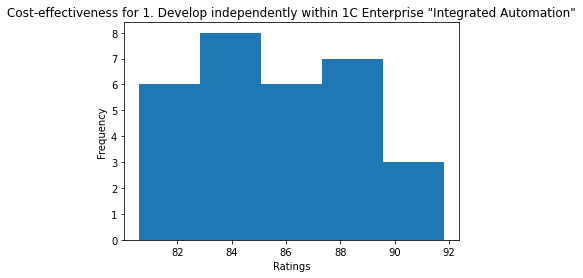

Solution: 1. Develop independently within 1C Enterprise "Integrated Automation"
Criterion: Integration with existing systems
Minimum rating: 81.1
Maximum rating: 92.0
Scope: 10.900000000000006
Optimal number of intervals: 5
Interval series: [(81.1, 83.28), (83.28, 85.46), (85.46, 87.64), (87.64, 89.82), (89.82, 92.0)]
Mean: 85.8
q1: 83.69999999999999  q3: 87.2
Dispersion 7.290000000000001
Variability: 0.03
Median: 85.6


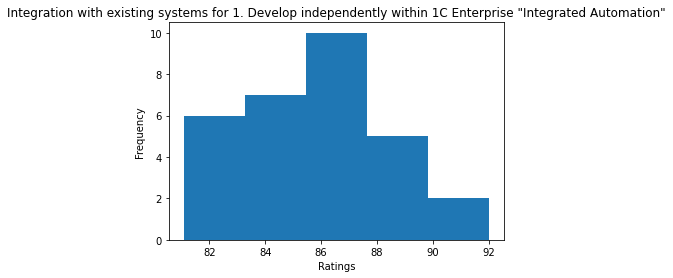

Solution: 1. Develop independently within 1C Enterprise "Integrated Automation"
Criterion: User-friendliness
Minimum rating: 81.9
Maximum rating: 91.9
Scope: 10.0
Optimal number of intervals: 5
Interval series: [(81.9, 83.9), (83.9, 85.9), (85.9, 87.9), (87.9, 89.9), (89.9, 91.9)]
Mean: 85.2
q1: 83.125  q3: 86.475
Dispersion 7.839999999999999
Variability: 0.03
Median: 84.0


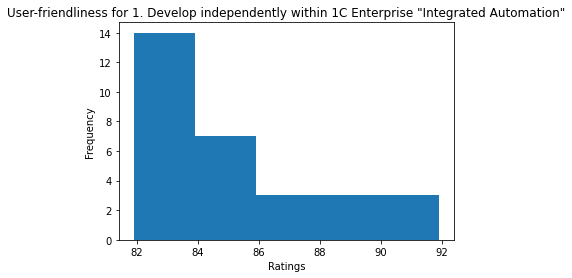

Solution: 1. Develop independently within 1C Enterprise "Integrated Automation"
Criterion: Scalability
Minimum rating: 81.4
Maximum rating: 94.5
Scope: 13.099999999999994
Optimal number of intervals: 5
Interval series: [(81.4, 84.02000000000001), (84.02000000000001, 86.64), (86.64, 89.26), (89.26, 91.88), (91.88, 94.5)]
Mean: 86.1
q1: 83.725  q3: 87.4
Dispersion 10.240000000000002
Variability: 0.04
Median: 85.6


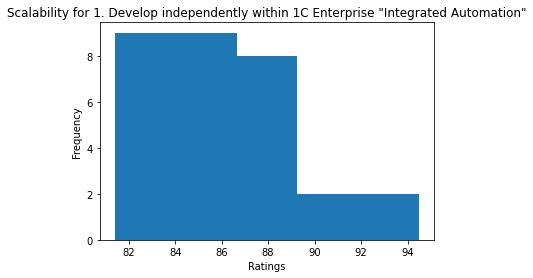

Solution: 1. Develop independently within 1C Enterprise "Integrated Automation"
Criterion: Security
Minimum rating: 81.3
Maximum rating: 93.2
Scope: 11.900000000000006
Optimal number of intervals: 5
Interval series: [(81.3, 83.67999999999999), (83.67999999999999, 86.06), (86.06, 88.44), (88.44, 90.82000000000001), (90.82000000000001, 93.2)]
Mean: 86.1
q1: 83.47500000000001  q3: 87.975
Dispersion 11.559999999999999
Variability: 0.04
Median: 85.7


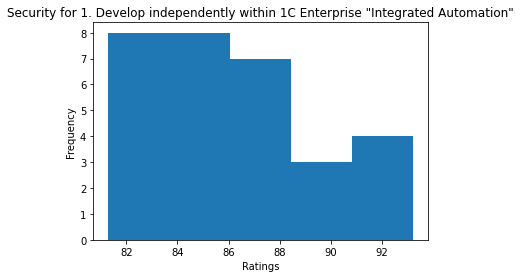

Solution: 2. Develop by external contractors within 1C Enterprise "Complex automation"
Criterion: Cost-effectiveness
Minimum rating: 80.5
Maximum rating: 92.5
Scope: 12.0
Optimal number of intervals: 5
Interval series: [(80.5, 82.9), (82.9, 85.3), (85.3, 87.7), (87.7, 90.1), (90.1, 92.5)]
Mean: 84.7
q1: 83.225  q3: 85.25
Dispersion 6.760000000000001
Variability: 0.03
Median: 84.2


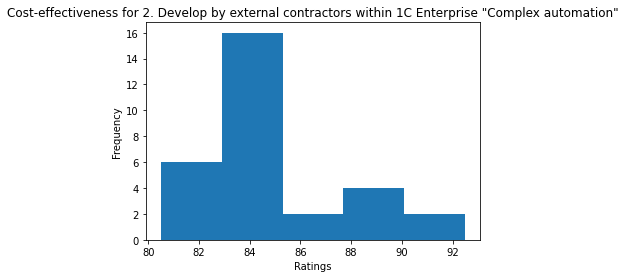

Solution: 2. Develop by external contractors within 1C Enterprise "Complex automation"
Criterion: Integration with existing systems
Minimum rating: 80.7
Maximum rating: 96.6
Scope: 15.899999999999991
Optimal number of intervals: 5
Interval series: [(80.7, 83.88), (83.88, 87.06), (87.06, 90.24), (90.24, 93.42), (93.42, 96.6)]
Mean: 86.5
q1: 84.025  q3: 88.0
Dispersion 10.889999999999999
Variability: 0.04
Median: 86.4


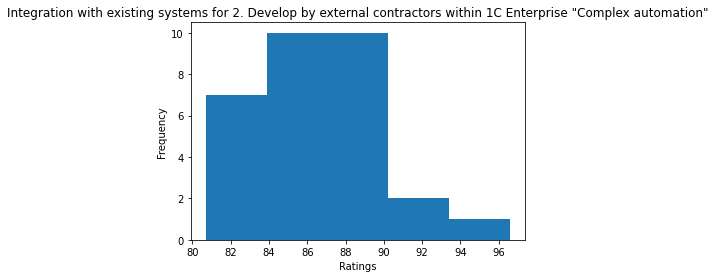

Solution: 2. Develop by external contractors within 1C Enterprise "Complex automation"
Criterion: User-friendliness
Minimum rating: 80.9
Maximum rating: 91.1
Scope: 10.199999999999989
Optimal number of intervals: 5
Interval series: [(80.9, 82.94), (82.94, 84.98), (84.98, 87.02), (87.02, 89.06), (89.06, 91.1)]
Mean: 85.4
q1: 83.325  q3: 87.275
Dispersion 7.290000000000001
Variability: 0.03
Median: 84.7


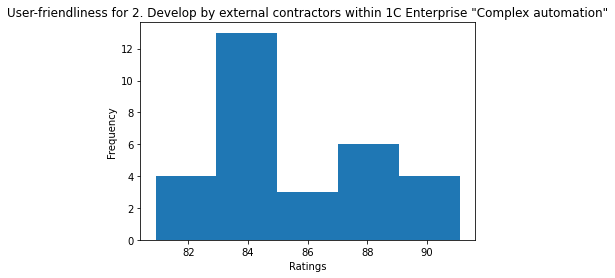

Solution: 2. Develop by external contractors within 1C Enterprise "Complex automation"
Criterion: Scalability
Minimum rating: 81.3
Maximum rating: 88.6
Scope: 7.299999999999997
Optimal number of intervals: 5
Interval series: [(81.3, 82.75999999999999), (82.75999999999999, 84.22), (84.22, 85.67999999999999), (85.67999999999999, 87.14), (87.14, 88.6)]
Mean: 84.8
q1: 82.9  q3: 86.675
Dispersion 4.41
Variability: 0.02
Median: 85.1


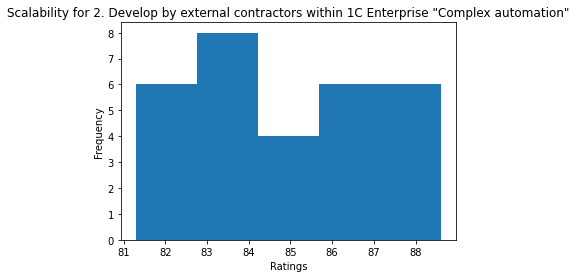

Solution: 2. Develop by external contractors within 1C Enterprise "Complex automation"
Criterion: Security
Minimum rating: 82.7
Maximum rating: 94.0
Scope: 11.299999999999997
Optimal number of intervals: 5
Interval series: [(82.7, 84.96000000000001), (84.96000000000001, 87.22), (87.22, 89.48), (89.48, 91.74), (91.74, 94.0)]
Mean: 86.0
q1: 83.625  q3: 87.675
Dispersion 7.290000000000001
Variability: 0.03
Median: 85.4


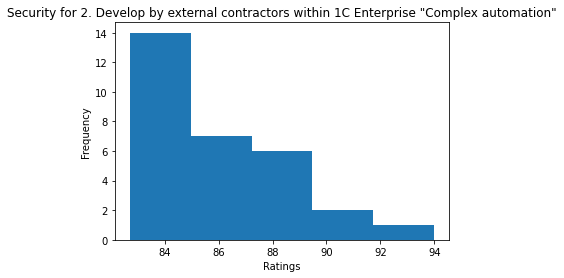

Solution: 3. Develop independently and integrate with existing systems
Criterion: Cost-effectiveness
Minimum rating: 81.3
Maximum rating: 96.2
Scope: 14.900000000000006
Optimal number of intervals: 5
Interval series: [(81.3, 84.28), (84.28, 87.26), (87.26, 90.24000000000001), (90.24000000000001, 93.22), (93.22, 96.2)]
Mean: 86.9
q1: 84.92500000000001  q3: 89.025
Dispersion 11.559999999999999
Variability: 0.04
Median: 86.4


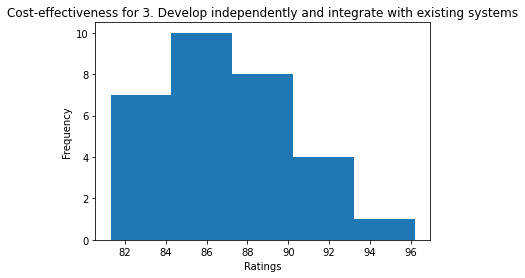

Solution: 3. Develop independently and integrate with existing systems
Criterion: Integration with existing systems
Minimum rating: 80.7
Maximum rating: 94.1
Scope: 13.399999999999991
Optimal number of intervals: 5
Interval series: [(80.7, 83.38), (83.38, 86.06), (86.06, 88.74), (88.74, 91.42), (91.42, 94.1)]
Mean: 85.1
q1: 82.575  q3: 87.325
Dispersion 12.96
Variability: 0.04
Median: 83.8


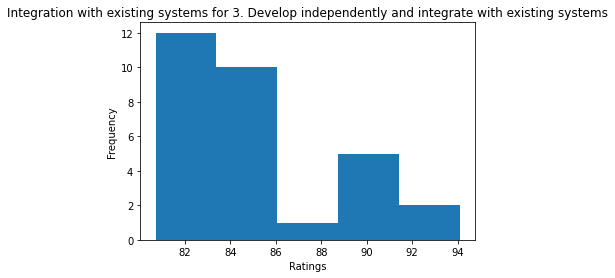

Solution: 3. Develop independently and integrate with existing systems
Criterion: User-friendliness
Minimum rating: 80.6
Maximum rating: 98.0
Scope: 17.400000000000006
Optimal number of intervals: 5
Interval series: [(80.6, 84.08), (84.08, 87.56), (87.56, 91.03999999999999), (91.03999999999999, 94.52), (94.52, 98.0)]
Mean: 86.5
q1: 83.92500000000001  q3: 87.4
Dispersion 13.690000000000001
Variability: 0.04
Median: 86.5


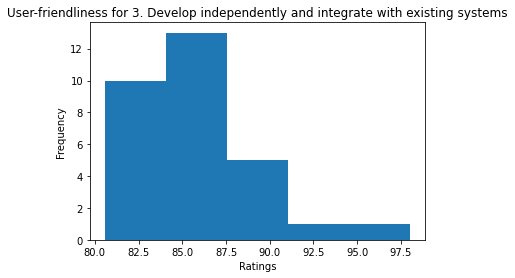

Solution: 3. Develop independently and integrate with existing systems
Criterion: Scalability
Minimum rating: 80.2
Maximum rating: 91.8
Scope: 11.599999999999994
Optimal number of intervals: 5
Interval series: [(80.2, 82.52), (82.52, 84.84), (84.84, 87.16), (87.16, 89.48), (89.48, 91.8)]
Mean: 85.4
q1: 82.9  q3: 87.875
Dispersion 11.559999999999999
Variability: 0.04
Median: 85.4


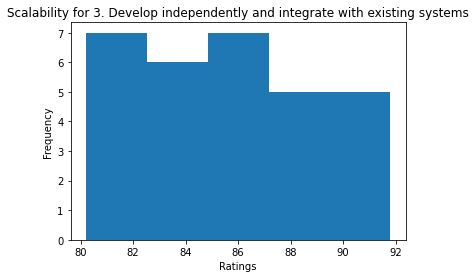

Solution: 3. Develop independently and integrate with existing systems
Criterion: Security
Minimum rating: 81.9
Maximum rating: 95.5
Scope: 13.599999999999994
Optimal number of intervals: 5
Interval series: [(81.9, 84.62), (84.62, 87.34), (87.34, 90.06), (90.06, 92.78), (92.78, 95.5)]
Mean: 87.1
q1: 84.97500000000001  q3: 89.575
Dispersion 10.889999999999999
Variability: 0.04
Median: 87.0


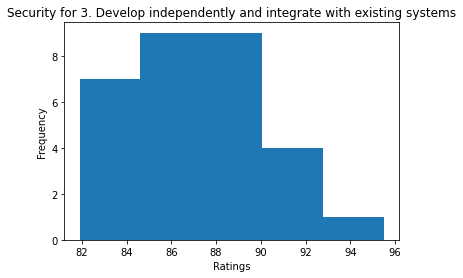

Solution: 4. Develop by external contractors and integrate with existing systems
Criterion: Cost-effectiveness
Minimum rating: 81.5
Maximum rating: 91.7
Scope: 10.200000000000003
Optimal number of intervals: 5
Interval series: [(81.5, 83.54), (83.54, 85.58), (85.58, 87.62), (87.62, 89.66), (89.66, 91.7)]
Mean: 86.0
q1: 84.14999999999999  q3: 87.625
Dispersion 7.290000000000001
Variability: 0.03
Median: 86.2


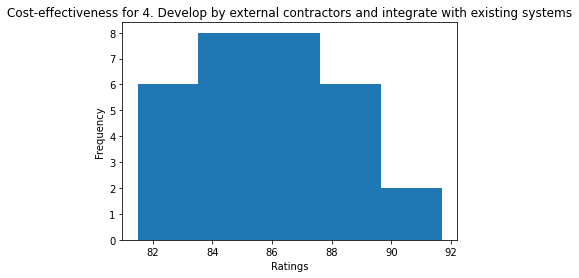

Solution: 4. Develop by external contractors and integrate with existing systems
Criterion: Integration with existing systems
Minimum rating: 81.0
Maximum rating: 93.7
Scope: 12.700000000000003
Optimal number of intervals: 5
Interval series: [(81.0, 83.54), (83.54, 86.08), (86.08, 88.62), (88.62, 91.16), (91.16, 93.7)]
Mean: 85.6
q1: 83.425  q3: 87.0
Dispersion 9.610000000000001
Variability: 0.04
Median: 85.2


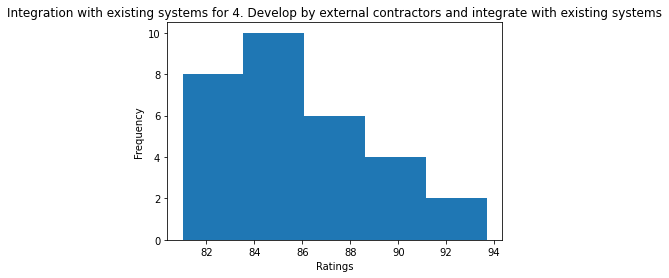

Solution: 4. Develop by external contractors and integrate with existing systems
Criterion: User-friendliness
Minimum rating: 81.0
Maximum rating: 94.7
Scope: 13.700000000000003
Optimal number of intervals: 5
Interval series: [(81.0, 83.74), (83.74, 86.48), (86.48, 89.22), (89.22, 91.96000000000001), (91.96000000000001, 94.7)]
Mean: 85.2
q1: 82.6  q3: 86.85000000000001
Dispersion 9.610000000000001
Variability: 0.04
Median: 85.2


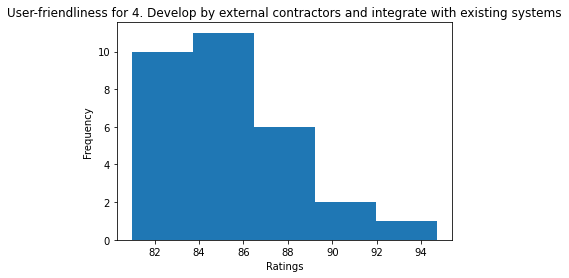

Solution: 4. Develop by external contractors and integrate with existing systems
Criterion: Scalability
Minimum rating: 81.1
Maximum rating: 92.0
Scope: 10.900000000000006
Optimal number of intervals: 5
Interval series: [(81.1, 83.28), (83.28, 85.46), (85.46, 87.64), (87.64, 89.82), (89.82, 92.0)]
Mean: 85.4
q1: 83.0  q3: 87.375
Dispersion 10.240000000000002
Variability: 0.04
Median: 85.1


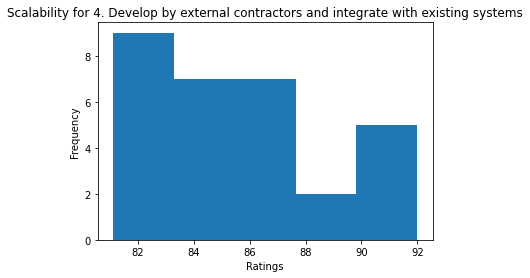

Solution: 4. Develop by external contractors and integrate with existing systems
Criterion: Security
Minimum rating: 80.5
Maximum rating: 92.9
Scope: 12.400000000000006
Optimal number of intervals: 5
Interval series: [(80.5, 82.98), (82.98, 85.46000000000001), (85.46000000000001, 87.94), (87.94, 90.42), (90.42, 92.9)]
Mean: 85.8
q1: 83.25  q3: 88.94999999999999
Dispersion 10.240000000000002
Variability: 0.04
Median: 85.4


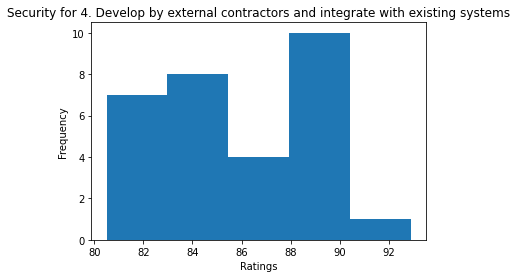

In [ ]:
# Calculate summary statistics for each solution and criterion
summary_stats = {}
for solution in ratings.keys():
    summary_stats[solution] = {}
    for criterion in ratings[solution].keys():
        # Get the expert ratings for the criterion
        expert_ratings = np.array(ratings[solution][criterion])
        sorted_ratings = sorted(ratings[solution][criterion])
        
        
        # Calculate the summary statistics
        min_rating = sorted_ratings[0]
        max_rating = sorted_ratings[-1]
        scope = max_rating - min_rating
        i = scope / n_intervals
        interval_series = [(min_rating + i * j, min_rating + i * (j + 1)) for j in range(n_intervals)]
        mean_rating = round(np.mean(expert_ratings), 1)
        median_rating = round(np.median(expert_ratings), 1)
        q1, q3 = np.percentile(expert_ratings, [25, 75])
        range_rating = round(max(expert_ratings) - min(expert_ratings), 1)
        iqr_rating = round(q3 - q1, 1)
        var_rating = round(np.var(expert_ratings), 1)
        std_rating = round(np.std(expert_ratings), 1)
        dispersion = std_rating **2
        cv_rating = round(std_rating / mean_rating, 2)
        print("Solution:", solution)
        print("Criterion:", criterion)
        print("Minimum rating:", min_rating)
        print("Maximum rating:", max_rating)
        print("Scope:", scope)
        print("Optimal number of intervals:", n_intervals)
        print("Interval series:", interval_series)
        print("Mean:", mean_rating)
        print("q1:", q1," q3:",q3)
        print("Dispersion", dispersion)
        print("Variability:", cv_rating)
        print("Median:", median_rating)

        # Create a histogram of the ratings for each criterion and solution
        plt.hist(ratings[solution][criterion], bins=int(n_intervals))
        plt.title(f"{criterion} for {solution}")
        plt.xlabel("Ratings")
        plt.ylabel("Frequency")
        plt.show()
        
        # Store the summary statistics in the dictionary
        summary_stats[solution][criterion] = {
            "min":min,
            "max":max,
            "mean": mean_rating,
            "median": median_rating,
            "q1": q1,
            "q3": q3,
            "range": range_rating,
            "iqr": iqr_rating,
            "var": var_rating,
            "std": std_rating,
            "cv": cv_rating
        }

Чтобы определить самую сильную альтернативу строится прадарная диаграмма. Диаграмма строится на основании медианных значений по каждому критерию.

In [ ]:
import plotly.graph_objs as go

# Create a list to store the radar charts for each solution
radar_charts = []

# Loop through each solution
for solution in ratings.keys():

    # Create a list to store the data for the radar chart
    data = []

    # Loop through each criterion
    for criterion in ratings[solution].keys():
        # Get the summary statistics for the criterion
        summary = summary_stats[solution][criterion]

        # Add the data to the list
        data.append(summary['median'])
  

    # Create a trace for the radar chart
    radar_chart = go.Scatterpolar(
        r = data,
        theta = criteria,
        fill = 'toself',
        name = solution
    )

    # Add the trace to the list of radar charts
    radar_charts.append(radar_chart)

# Create the layout for the radar chart
layout = go.Layout(
    polar = dict(
        radialaxis = dict(
            visible = True,
            range = [80, 90]
        )
    ),
    showlegend = True
)

# Create the figure
fig = go.Figure(data=radar_charts, layout=layout)

# Show the figure
fig.show()


In [ ]:
radar_charts

[Scatterpolar({
     'fill': 'toself',
     'name': '1. Develop independently within 1C Enterprise "Integrated Automation"',
     'r': [85.4, 85.6, 84.0, 85.6, 85.7],
     'theta': [Cost-effectiveness, Integration with existing systems, User-
               friendliness, Scalability, Security]
 }), Scatterpolar({
     'fill': 'toself',
     'name': '2. Develop by external contractors within 1C Enterprise "Complex automation"',
     'r': [84.2, 86.4, 84.7, 85.1, 85.4],
     'theta': [Cost-effectiveness, Integration with existing systems, User-
               friendliness, Scalability, Security]
 }), Scatterpolar({
     'fill': 'toself',
     'name': '3. Develop independently and integrate with existing systems',
     'r': [86.4, 83.8, 86.5, 85.4, 87.0],
     'theta': [Cost-effectiveness, Integration with existing systems, User-
               friendliness, Scalability, Security]
 }), Scatterpolar({
     'fill': 'toself',
     'name': '4. Develop by external contractors and integrate wit

Далее строятся графики для анализа экспертных оценок по каждой альтернативе

In [ ]:
import plotly.graph_objects as go
box_plot = go.Figure()
box_data = []
solution = solutions[0]
solution_data = []
for criterion in summary_stats[solution].keys():
    solution_data.append(ratings[solution][criterion])
    box_data.append(solution_data)
for i, criterion in enumerate(criteria):
    box_plot.add_trace(go.Box(
        y=[solution_data[i] for solution_data in box_data],
        name=criterion,
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8
    ))
    box_plot.update_layout(
    title="Solution "+solution,
    xaxis_title="Criteria",
    yaxis_title="Criterion Score",
    showlegend=True
)
box_plot.show()

In [ ]:
import plotly.graph_objects as go
box_plot = go.Figure()
box_data = []
solution = solutions[1]
solution_data = []
for criterion in summary_stats[solution].keys():
    solution_data.append(ratings[solution][criterion])
    box_data.append(solution_data)
for i, criterion in enumerate(criteria):
    box_plot.add_trace(go.Box(
        y=[solution_data[i] for solution_data in box_data],
        name=criterion,
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8
    ))
    box_plot.update_layout(
    title="Solution "+solution,
    xaxis_title="Criteria",
    yaxis_title="Criterion Score",
    showlegend=True
)
box_plot.show()

In [ ]:
import plotly.graph_objects as go
box_plot = go.Figure()
box_data = []
solution = solutions[2]
solution_data = []
for criterion in summary_stats[solution].keys():
    solution_data.append(ratings[solution][criterion])
    box_data.append(solution_data)
for i, criterion in enumerate(criteria):
    box_plot.add_trace(go.Box(
        y=[solution_data[i] for solution_data in box_data],
        name=criterion,
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8
    ))
    box_plot.update_layout(
    title="Solution "+solution,
    xaxis_title="Criteria",
    yaxis_title="Criterion Score",
    showlegend=True
)
box_plot.show()

In [ ]:
import plotly.graph_objects as go
box_plot = go.Figure()
box_data = []
solution = solutions[3]
solution_data = []
for criterion in summary_stats[solution].keys():
    solution_data.append(ratings[solution][criterion])
    box_data.append(solution_data)
for i, criterion in enumerate(criteria):
    box_plot.add_trace(go.Box(
        y=[solution_data[i] for solution_data in box_data],
        name=criterion,
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8
    ))
    box_plot.update_layout(
    title="Solution "+solution,
    xaxis_title="Criteria",
    yaxis_title="Criterion Score",
    showlegend=True
)
box_plot.show()